<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/orIC_prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of replication origins by calculating DNA structural properties

Dataset Obtained from http://lin-group.cn/server/iORI-PseKNC2.0/index.html

In [ ]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-01-19 13:25:37--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123928 (121K) [text/plain]
Saving to: ‘positive-sequences.txt’

positive-sequences. 100%[===================>] 121.02K  --.-KB/s    in 0.03s   

2021-01-19 13:25:37 (3.67 MB/s) - ‘positive-sequences.txt’ saved [123928/123928]

--2021-01-19 13:25:37--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respon

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

In [ ]:
parameters=open("/content/90_sdandard.txt")
data_parameters=pd.read_csv(parameters,delimiter="\t")

In [ ]:
data_parameters.head()

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
0,Base stacking,-0.07,-0.65,-2.46,-0.92,0.49,1.02,-0.92,0.57,-0.58,0.57,-0.07,0.49,0.57,1.60,-0.65,1.02
1,Protein induced deformability,0.36,-0.14,-0.30,-0.83,-0.89,-0.64,-0.83,-1.05,2.23,1.51,0.36,-0.89,1.51,0.42,-0.14,-0.64
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
3,Dinucleotide GC Content,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37
4,A-philicity,-1.19,1.02,0.32,-1.36,-0.80,0.99,-1.36,-0.10,-0.27,1.19,-1.19,-0.80,1.19,0.32,1.02,0.99


In [ ]:
data_parameters.describe()

,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.222222,-0.022333,0.375333,0.145000,-0.178000,0.020111,0.180333,0.056889,0.052889,-0.237667,0.168889,-0.138111,-0.260222,-0.415889,-0.039889,0.068889
std,0.952184,0.548620,1.207512,0.918965,0.697511,0.957133,0.907413,1.197706,1.294959,0.864546,0.973112,0.703265,0.866836,1.261291,0.555800,0.916169
min,-1.690000,-1.370000,-2.460000,-2.100000,-1.750000,-2.020000,-2.100000,-2.380000,-2.870000,-1.970000,-1.690000,-1.750000,-1.970000,-2.370000,-1.370000,-2.020000
25%,-0.530000,-0.390000,-0.395000,-0.560000,-0.617500,-0.770000,-0.490000,-0.877500,-1.035000,-0.860000,-0.660000,-0.552500,-0.897500,-1.370000,-0.407500,-0.692500
50%,0.155000,-0.035000,0.335000,0.125000,-0.125000,0.050000,0.145000,-0.050000,-0.040000,-0.245000,0.030000,-0.120000,-0.300000,-0.680000,-0.035000,0.075000
75%,1.080000,0.277500,1.370000,0.970000,0.150000,0.587500,1.000000,1.022500,1.335000,0.245000,1.050000,0.215000,0.280000,0.382500,0.277500,0.650000
max,2.080000,1.230000,2.520000,1.660000,1.590000,2.520000,1.660000,3.160000,2.360000,2.010000,2.080000,1.590000,2.010000,3.420000,1.230000,2.200000


In [ ]:
positive_sequences=open("/content/positive-sequences.txt","r")
negative_sequences=open("/content/negative-sequences.txt","r")

In [ ]:
p_data=positive_sequences.readlines()
n_data=negative_sequences.readlines()

In [ ]:
len(p_data)+len(n_data)

1622

In [ ]:
p_data=p_data[1::2]
n_data=n_data[1::2]

In [ ]:
x_data=[]
y_data=[]
for seq in range(len(p_data)):
  seq_data=np.zeros(90)
  for pos in range(0,298):
    seq_data+=np.array(data_parameters[p_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(1) 

In [ ]:
for seq in range(len(n_data)):
  seq_data=np.zeros(90)
  for pos in range(0,298):
    seq_data+=np.array(data_parameters[n_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(0) 

In [ ]:
y_data=np.array(y_data)

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
zz=pd.DataFrame(X,columns=np.array(data_parameters["Physicochemical properties"]))
zz["result"]=MinMaxScaler().fit_transform(y_data.reshape(-1,1))

In [ ]:
zz.head()

,Base stacking,Protein induced deformability,B-DNA twist,Dinucleotide GC Content,A-philicity,Propeller twist,Duplex stability-free energy,Duplex stability-disrupt energy,DNA denaturation,Bending stiffness,Protein DNA twist,Stabilising energy of Z-DNA,Aida_BA_transition,Breslauer_dG,Breslauer_dH,Breslauer_dS,Electron_interaction,Hartman_trans_free_energy,Helix-Coil_transition,Ivanov_BA_transition,Lisser_BZ_transition,Polar_interaction,SantaLucia_dG,SantaLucia_dH,SantaLucia_dS,Sarai_flexibility,Stability,Stacking_energy,Sugimoto_dG,Sugimoto_dH,Sugimoto_dS,Watson-Crick_interaction,Twist,Tilt,Roll,Shift,Slide,Rise,Stacking energy,Bend,...,Melting Temperature,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Free energy,Twist_twist,Tilt_tilt,Roll_roll,Twist_tilt,Twist_roll,Tilt_roll,Shift_shift,Slide_slide,Rise_rise,Shift_slide,Shift_rise,Slide_rise,Twist_shift,Twist_slide,Twist_rise,Tilt_shift,Tilt_slide,Tilt_rise,Roll_shift,Roll_slide,Roll_rise,Slide stiffness,Shift stiffness,Roll stiffness,Rise stiffness,Tilt stiffness,Twist stiffness,Wedge,Direction,Flexibility_slide,Flexibility_shift,Entropy,result
0,0.667248,0.207075,0.352335,0.318841,0.801238,0.159083,0.682155,0.338739,0.354118,0.298042,0.799532,0.668758,0.142697,0.311842,0.414762,0.557566,0.318841,0.635699,0.305585,0.801238,0.635583,0.318841,0.359227,0.506612,0.733986,0.206485,0.418896,0.331241,0.322645,0.371030,0.369063,0.318841,0.809065,0.678453,0.596737,0.836844,0.450808,0.305054,0.168706,0.480451,...,0.354074,0.632705,0.312244,0.226936,0.282910,0.628970,0.671551,0.746279,0.726846,0.830443,0.768402,0.767706,0.676615,0.813653,0.652530,0.414302,0.799288,0.737272,0.351930,0.747970,0.317856,0.077344,0.671234,0.282229,0.231461,0.663414,0.360209,0.202391,0.450808,0.836844,0.596737,0.305054,0.678453,0.809065,0.820465,0.519015,0.744876,0.489903,0.745814,1.0
1,0.460070,0.526228,0.715396,0.550725,0.727351,0.438287,0.466421,0.510226,0.526810,0.497306,0.629143,0.478658,0.469931,0.534679,0.464304,0.481780,0.550725,0.418211,0.531047,0.727351,0.418313,0.550725,0.561412,0.451170,0.533243,0.374634,0.576815,0.538306,0.527428,0.504716,0.466280,0.550725,0.431609,0.610706,0.627558,0.570699,0.456325,0.669285,0.341942,0.333818,...,0.555485,0.408672,0.535148,0.337580,0.473445,0.495284,0.455510,0.412946,0.612250,0.740775,0.457810,0.523933,0.411110,0.599467,0.572004,0.667359,0.624625,0.542147,0.387285,0.451212,0.629392,0.371140,0.480267,0.426060,0.435016,0.434356,0.481531,0.439509,0.456325,0.570699,0.627558,0.669285,0.610706,0.431609,0.658061,0.571631,0.456964,0.339661,0.648293,1.0
2,0.421700,0.447621,0.269487,0.618357,0.566056,0.396451,0.368160,0.687437,0.621255,0.588985,0.565922,0.446475,0.343592,0.655862,0.738032,0.773720,0.618357,0.363119,0.653470,0.566056,0.364858,0.618357,0.630808,0.534588,0.577852,0.092516,0.599221,0.577713,0.618632,0.657812,0.632599,0.618357,0.666667,0.849663,0.452214,0.748674,0.154867,0.644410,0.426891,0.261805,...,0.619669,0.337006,0.614669,0.285627,0.689060,0.342188,0.384855,0.758308,0.877496,0.683026,0.554758,0.498538,0.365994,0.735265,0.626896,0.178085,0.778251,0.763461,0.347875,0.623017,0.186231,0.254878,0.285888,0.754528,0.371211,0.492777,0.425315,0.481348,0.154867,0.748674,0.452214,0.644410,0.849663,0.666667,0.751493,0.431446,0.592239,0.651451,0.599713,1.0
3,0.477097,0.438548,0.578667,0.507246,0.674744,0.372823,0.518345,0.427285,0.474916,0.441339,0.588797,0.552911,0.432506,0.439438,0.402252,0.464846,0.507246,0.433794,0.436962,0.674744,0.435421,0.507246,0.503262,0.404374,0.524092,0.388347,0.541145,0.522315,0.480225,0.485442,0.458539,0.507246,0.652828,0.640576,0.368816,0.564802,0.476291,0.715632,0.404164,0.344305,...,0.511935,0.489053,0.487168,0.285403,0.523491,0.514558,0.497631,0.575943,0.659161,0.488745,0.488330,0.638835,0.422884,0.405461,0.478862,0.491349,0.626593,0.456806,0.422802,0.459755,0.474678,0.427876,0.484663,0.633710,0.468731,0.552845,0.382679,0.500000,0.476291,0.564802,0.368816,0.715632,0

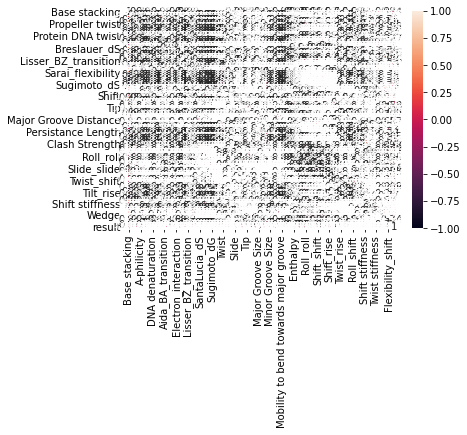

In [ ]:
import seaborn as sn
corrMatrix = zz.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
result_corr=pd.Series(corrMatrix["result"])

In [ ]:
np.argsort(np.abs(np.array(result_corr)))

array([47, 25, 32, 84, 49, 69, 23, 45,  2, 71, 59, 66, 76, 65, 14, 60, 79,
       36, 80, 35, 83, 33, 89,  7, 41, 72, 13, 18, 34, 81, 63, 86, 58, 78,
       68, 46,  8, 85, 87, 88, 10, 70, 22, 28, 52, 62, 73, 51,  6, 77, 44,
       57, 54, 39, 26, 61, 43, 12,  0, 27, 56, 29, 11, 75, 40, 55, 30, 64,
       21, 31,  3, 16,  4, 19,  9, 50, 48, 15, 38, 42, 74, 53, 20, 17,  5,
        1, 24, 82, 37, 67, 90])

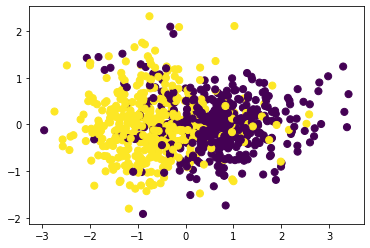

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(X)
x_pca=pca.transform(X)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,marker="o",s=50)

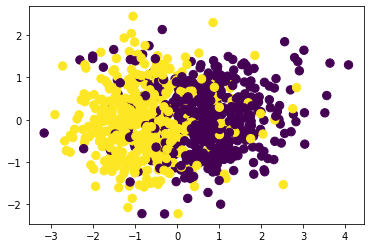

In [ ]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
x_mds=mds.fit_transform(X)
plt.scatter(x_mds[:,0],x_mds[:,1],c=y,marker="o",s=70)

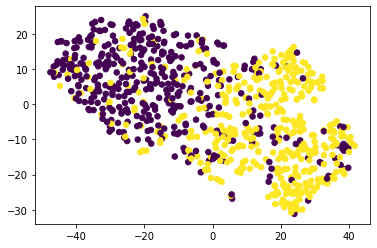

In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=0)
x_tsne=tsne.fit_transform(X)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y,s=30)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
degree=2
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_scaled.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
np.mean((polyreg_scaled.predict(x_test)-y_test)**2)

0.1144446396246189

In [ ]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.13675447789634146

In [ ]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(x_train, y_train)
np.mean((linlasso.predict(x_test)-y_test)**2)

0.2500004704191057

In [ ]:
from sklearn.svm import LinearSVC
#for c in range(5):
#  clf = LinearSVC(C=10**c).fit(x_train, y_train)
#  print(np.mean((clf.predict(x_test)-y_test)**2))
svc = LinearSVC(C=10**3,max_iter=10000).fit(x_train, y_train)
print(np.mean((svc.predict(x_test)-y_test)**2))

0.14634146341463414


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)
print(np.mean((clf.predict(x_test)-y_test)**2))

0.2073170731707317


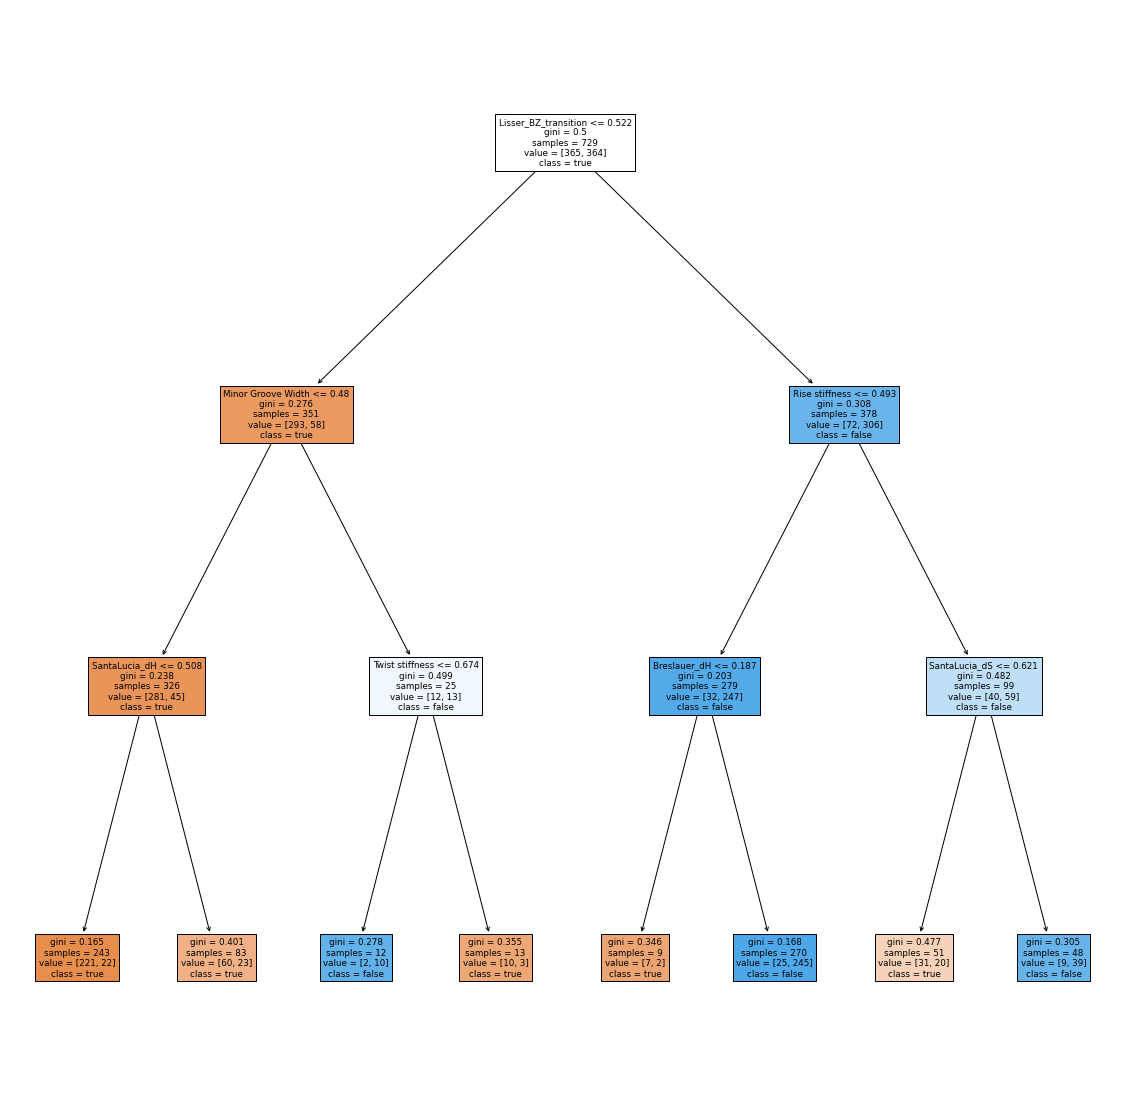

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, 
                   feature_names=np.array(data_parameters["Physicochemical properties"]),  
                   class_names=["true","false"],
                   filled=True)
plt.show()

In [ ]:
y_train=np.array(y_train)

In [ ]:
len(y_train)

729

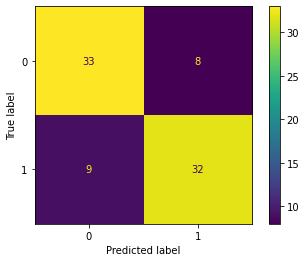

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()  

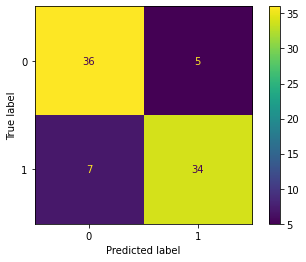

In [ ]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print(np.mean((clf.predict(x_test)-y_test)**2))

0.14634146341463414


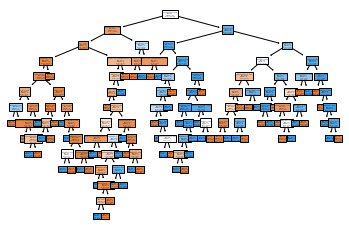

In [ ]:
tree.plot_tree(clf.estimators_[0], 
                   feature_names=np.array(data_parameters["Physicochemical properties"]),  
                   class_names=["true","false"],
                   filled=True)
plt.show()

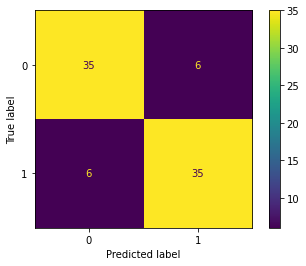

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
model=keras.Sequential([
   keras.layers.Dense(1024,input_shape=(90,),activation=tf.nn.relu),
   keras.layers.Dense(512,activation=tf.nn.relu),
   keras.layers.Dense(5,activation=tf.nn.softmax)                     
])
model.summary()
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy")
history=model.fit(x_train,y_train,epochs=10,batch_size=10)
model.evaluate(x_test,np.array(y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              93184     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 2565      
Total params: 620,549
Trainable params: 620,549
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
73/73 [==============================] - 1s 7ms/step - loss: 0.6756
Epoch 2/10
73/73 [==============================] - 0s 7ms/step - loss: 0.5238
Epoch 3/10
73/73 [==============================] - 0s 6ms/step - loss: 0.4606
Epoch 4/10
73/73 [==============================] - 0s 6ms/step - loss: 0.4634
Epoch 5/10
73/73 [==============================] - 0s 6ms/ste

0.4175493121147156

# Convolutional Neural Networks

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
x_data=[]
y_data=[]
for seq in range(len(p_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters[p_data[seq][pos:pos+2]]))
  x_data.append(seq_data)
  y_data.append(1)
for seq in range(len(n_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters[n_data[seq][pos:pos+2]]))
  x_data.append(seq_data)
  y_data.append(0) 

In [ ]:
x_data=np.array(x_data)
y_data=np.array(y_data)

In [ ]:
x_data.shape,y_data.shape

((811, 298, 90), (811,))

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.model_selection import train_test_split

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.4,random_state=233)
x_train2,x_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.4,random_state=213)
x_train3,x_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.4,random_state=223)
x_train4,x_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.4,random_state=3)
x_train5,x_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.4,random_state=2)

In [ ]:
x_train1.shape,x_test1.shape

((486, 298, 90), (325, 298, 90))

In [ ]:
x_train5.shape,x_test5.shape

((486, 298, 90), (325, 298, 90))

In [ ]:
x_train1=x_train1.reshape(486,298, 90, 1)
x_test1=x_test1.reshape(325,298, 90, 1)
x_train2=x_train2.reshape(486,298, 90, 1)
x_test2=x_test2.reshape(325,298, 90, 1)
x_train3=x_train3.reshape(486,298, 90, 1)
x_test3=x_test3.reshape(325,298, 90, 1)
x_train4=x_train4.reshape(486,298, 90, 1)
x_test4=x_test4.reshape(325,298, 90, 1)
x_train5=x_train5.reshape(486,298, 90, 1)
x_test5=x_test5.reshape(325,298, 90, 1)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu"),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 148, 44, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 208384)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                13336640  
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 13,336,930
Trainable params: 13,336,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train1,y_train1,epochs=10,batch_size=10,validation_data=(x_test1,y_test1))
test_loss=model.evaluate(x_test1,y_test1)

Epoch 1/10
49/49 [==============================] - 11s 219ms/step - loss: 13.9083 - accuracy: 0.4915 - val_loss: 2.3110 - val_accuracy: 0.6123
Epoch 2/10
49/49 [==============================] - 11s 216ms/step - loss: 1.0229 - accuracy: 0.7729 - val_loss: 3.1627 - val_accuracy: 0.5785
Epoch 3/10
49/49 [==============================] - 11s 216ms/step - loss: 0.4492 - accuracy: 0.8689 - val_loss: 1.8275 - val_accuracy: 0.6431
Epoch 4/10
49/49 [==============================] - 11s 222ms/step - loss: 0.1188 - accuracy: 0.9617 - val_loss: 1.6612 - val_accuracy: 0.6554
Epoch 5/10
49/49 [==============================] - 11s 216ms/step - loss: 0.1023 - accuracy: 0.9586 - val_loss: 1.3215 - val_accuracy: 0.7046
Epoch 6/10
49/49 [==============================] - 10s 215ms/step - loss: 0.0688 - accuracy: 0.9781 - val_loss: 1.4816 - val_accuracy: 0.6862
Epoch 7/10
49/49 [==============================] - 10s 212ms/step - loss: 0.0235 - accuracy: 0.9866 - val_loss: 1.0758 - val_accuracy: 0.744

In [ ]:
model.predict(x_test1);

In [ ]:
history=model.fit(x_train2,y_train2,epochs=10,batch_size=10,validation_data=(x_test2,y_test2))
test_loss1=model.evaluate(x_test2,y_test2)

Epoch 1/10
49/49 [==============================] - 11s 230ms/step - loss: 0.2740 - accuracy: 0.9177 - val_loss: 0.3256 - val_accuracy: 0.8831
Epoch 2/10
49/49 [==============================] - 11s 231ms/step - loss: 0.1535 - accuracy: 0.9588 - val_loss: 0.3338 - val_accuracy: 0.8800
Epoch 3/10
49/49 [==============================] - 11s 230ms/step - loss: 0.0619 - accuracy: 0.9897 - val_loss: 0.3020 - val_accuracy: 0.9015
Epoch 4/10
49/49 [==============================] - 11s 230ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.3928 - val_accuracy: 0.8677
Epoch 5/10
49/49 [==============================] - 11s 232ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.3646 - val_accuracy: 0.8923
Epoch 6/10
49/49 [==============================] - 11s 231ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3740 - val_accuracy: 0.8985
Epoch 7/10
49/49 [==============================] - 11s 231ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3833 - val_accuracy: 0.8954

In [ ]:
history=model.fit(x_train3,y_train3,epochs=10,batch_size=10,validation_data=(x_test3,y_test3))
test_loss2=model.evaluate(x_test3,y_test3)

Epoch 1/10
49/49 [==============================] - 11s 228ms/step - loss: 0.2133 - accuracy: 0.9362 - val_loss: 0.2112 - val_accuracy: 0.9477
Epoch 2/10
49/49 [==============================] - 11s 227ms/step - loss: 0.0539 - accuracy: 0.9856 - val_loss: 0.1046 - val_accuracy: 0.9692
Epoch 3/10
49/49 [==============================] - 11s 228ms/step - loss: 0.0134 - accuracy: 0.9979 - val_loss: 0.1121 - val_accuracy: 0.9600
Epoch 4/10
49/49 [==============================] - 11s 228ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9692
Epoch 5/10
49/49 [==============================] - 11s 228ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1105 - val_accuracy: 0.9662
Epoch 6/10
49/49 [==============================] - 11s 227ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9600
Epoch 7/10
49/49 [==============================] - 11s 229ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1167 - val_accuracy: 0.9692

In [ ]:
history=model.fit(x_train4,y_train4,epochs=10,batch_size=10,validation_data=(x_test4,y_test4))
test_loss3=model.evaluate(x_test4,y_test4)

Epoch 1/10
49/49 [==============================] - 11s 227ms/step - loss: 0.0880 - accuracy: 0.9774 - val_loss: 0.0537 - val_accuracy: 0.9908
Epoch 2/10
49/49 [==============================] - 11s 225ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9938
Epoch 3/10
49/49 [==============================] - 11s 227ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0431 - val_accuracy: 0.9938
Epoch 4/10
49/49 [==============================] - 11s 227ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9938
Epoch 5/10
49/49 [==============================] - 11s 229ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9938
Epoch 6/10
49/49 [==============================] - 11s 227ms/step - loss: 9.2416e-04 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9938
Epoch 7/10
49/49 [==============================] - 11s 229ms/step - loss: 7.7263e-04 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy

In [ ]:
history=model.fit(x_train5,y_train5,epochs=10,batch_size=10,validation_data=(x_test5,y_test5))
test_loss4=model.evaluate(x_test5,y_test5)

Epoch 1/10
49/49 [==============================] - 11s 229ms/step - loss: 0.0322 - accuracy: 0.9959 - val_loss: 0.0270 - val_accuracy: 0.9969
Epoch 2/10
 6/49 [==>...........................] - ETA: 8s - loss: 0.0065 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
test_loss,test_loss1,test_loss2,test_loss3

([0.7774713039398193, 0.766153872013092],
 [0.40525832772254944, 0.892307698726654],
 [0.1237020418047905, 0.9692307710647583],
 [0.04659847542643547, 0.9938461780548096])

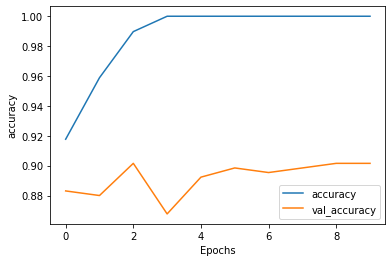

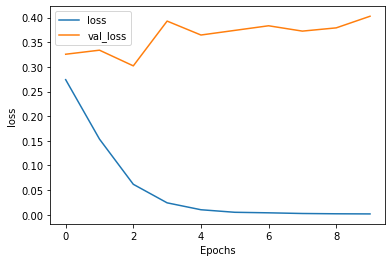

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from keras import regularizers
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.1),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(2,2),activation="relu"),
  keras.layers.Dropout(0.1),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(2,2),activation="relu"),
  keras.layers.Dropout(0.1),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(1)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 297, 89, 32)       160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 297, 89, 32)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 148, 44, 32)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 147, 43, 32)       4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 147, 43, 32)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 21, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 20, 32)       

In [ ]:
x_train5,x_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.2,random_state=2)
x_train5=x_train5.reshape(648,298, 90, 1)
x_test5=x_test5.reshape(163,298, 90, 1)
history=model.fit(x_train5,y_train5,epochs=10,batch_size=10,validation_data=(x_test5,y_test5))
test_loss4=model.evaluate(x_test5,y_test5)

Epoch 1/10
65/65 [==============================] - 20s 314ms/step - loss: 0.6986 - accuracy: 0.4877 - val_loss: 0.6989 - val_accuracy: 0.4908
Epoch 2/10
65/65 [==============================] - 20s 312ms/step - loss: 0.6976 - accuracy: 0.5093 - val_loss: 0.6971 - val_accuracy: 0.4908
Epoch 3/10
65/65 [==============================] - 20s 314ms/step - loss: 0.6975 - accuracy: 0.5046 - val_loss: 0.6975 - val_accuracy: 0.4908
Epoch 4/10
65/65 [==============================] - 20s 314ms/step - loss: 0.6973 - accuracy: 0.5031 - val_loss: 0.6972 - val_accuracy: 0.4908
Epoch 5/10
65/65 [==============================] - 20s 315ms/step - loss: 0.6973 - accuracy: 0.5062 - val_loss: 0.6977 - val_accuracy: 0.4908
Epoch 6/10
65/65 [==============================] - 20s 313ms/step - loss: 0.6983 - accuracy: 0.5062 - val_loss: 0.6984 - val_accuracy: 0.4908
Epoch 7/10
65/65 [==============================] - 20s 313ms/step - loss: 0.6980 - accuracy: 0.5139 - val_loss: 0.6985 - val_accuracy: 0.4908

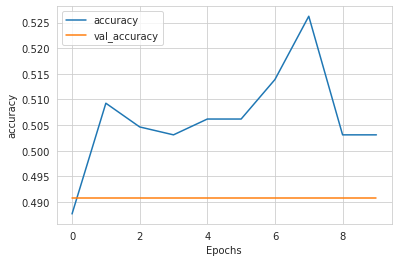

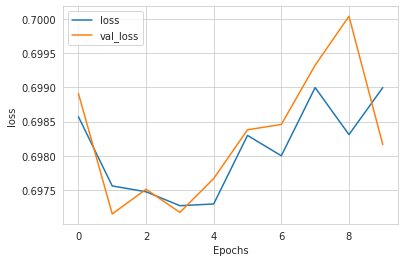

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 297, 89, 32)       160       
_________________________________________________________________
dropout_20 (Dropout)         (None, 297, 89, 32)       0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 148, 44, 32)       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 208384)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                13336640  
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 130       
Total params: 13,336,930
Trainable params: 13,336,930
Non-trainable params: 0
_________________________________________

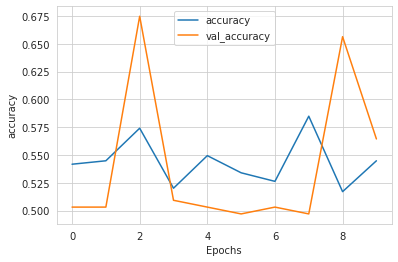

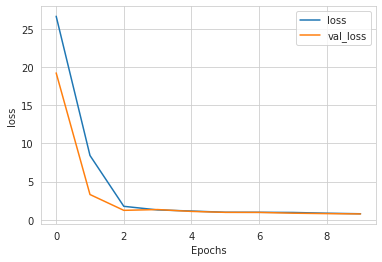

In [ ]:
from keras import regularizers
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.1),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(1)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
x_train5,x_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.2,random_state=21)
x_train5=x_train5.reshape(648,298, 90, 1)
x_test5=x_test5.reshape(163,298, 90, 1)
history=model.fit(x_train5,y_train5,epochs=10,batch_size=10,validation_data=(x_test5,y_test5))
test_loss4=model.evaluate(x_test5,y_test5)
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 297, 89, 32)       160       
_________________________________________________________________
dropout_21 (Dropout)         (None, 297, 89, 32)       0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 845856)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                54134848  
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 130       
Total params: 54,135,138
Trainable params: 54,135,138
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
65/65 [==============================] - 46s 696ms/step - loss: 29.0906 - accuracy: 0.6011 - val

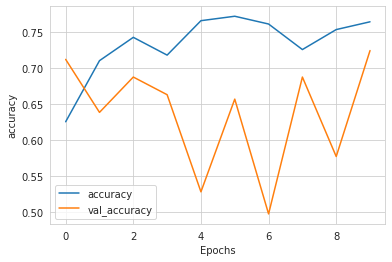

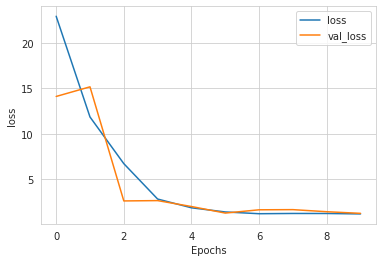

In [ ]:
from keras import regularizers
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.05),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.1)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
x_train5,x_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.2,random_state=2)
x_train5=x_train5.reshape(648,298, 90, 1)
x_test5=x_test5.reshape(163,298, 90, 1)
history=model.fit(x_train5,y_train5,epochs=10,batch_size=10,validation_data=(x_test5,y_test5))
test_loss4=model.evaluate(x_test5,y_test5)
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
x_train5.shape,x_test5.shape

((648, 90), (163, 90))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 296, 88, 32)       320       
_________________________________________________________________
dropout_22 (Dropout)         (None, 296, 88, 32)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 294, 86, 32)       9248      
_________________________________________________________________
dropout_23 (Dropout)         (None, 294, 86, 32)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 809088)            0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                51781696  
_________________________________________________________________
dense_35 (Dense)             (None, 2)               

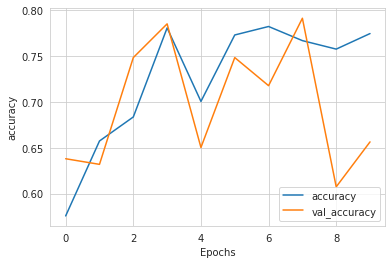

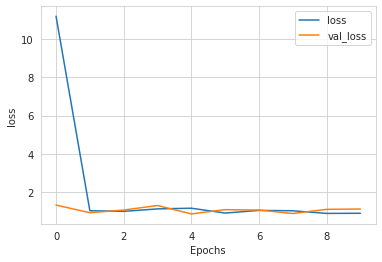

In [ ]:
from keras import regularizers
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.05),
  tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.05),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.1)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
x_train5,x_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.2,random_state=2)
x_train5=x_train5.reshape(648,298, 90, 1)
x_test5=x_test5.reshape(163,298, 90, 1)
history=model.fit(x_train5,y_train5,epochs=10,batch_size=10,validation_data=(x_test5,y_test5))
test_loss4=model.evaluate(x_test5,y_test5)
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 296, 88, 32)       320       
_________________________________________________________________
dropout_24 (Dropout)         (None, 296, 88, 32)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 294, 86, 32)       9248      
_________________________________________________________________
dropout_25 (Dropout)         (None, 294, 86, 32)       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 809088)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                51781696  
_________________________________________________________________
dense_37 (Dense)             (None, 2)               

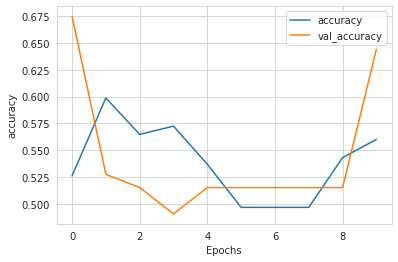

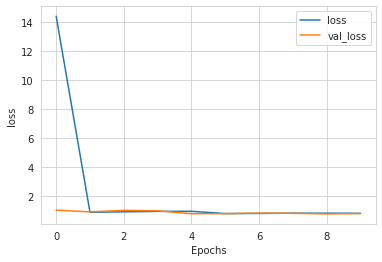

In [ ]:
from keras import regularizers
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.05),
  tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(298,90,1)),
  keras.layers.Dropout(0.05),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(1)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
x_train5,x_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.2,random_state=2)
x_train5=x_train5.reshape(648,298, 90, 1)
x_test5=x_test5.reshape(163,298, 90, 1)
history=model.fit(x_train5,y_train5,epochs=10,batch_size=10,validation_data=(x_test5,y_test5))
test_loss4=model.evaluate(x_test5,y_test5)
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from keras import regularizers
import tensorflow as tf

model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.005),
  tf.keras.layers.Conv2D(32,(2,2),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.005),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 44, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 148, 44, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 43, 32)       4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 21, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 21, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 49056)             0

In [ ]:
history=model.fit(x_train1,y_train1,epochs=10,batch_size=10,validation_data=(x_test1,y_test1))
test_loss=model.evaluate(x_test1,y_test1)

In [ ]:
test_loss

[0.9360945224761963, 0.6338461637496948]

In [ ]:
for ilayer, layer in enumerate(model.layers):
    print("{:3.0f} {:10}".format(ilayer, layer.name))

  0 conv2d_2  
  1 max_pooling2d_2
  2 flatten_1 
  3 dense_5   
  4 dense_6   


This image has the input image to the CNN

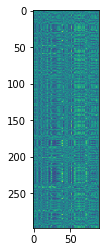

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img=x_test1[0].reshape(298,90)
plt.imshow(img)
plt.show()

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test1[0].reshape(1,298,90,1))
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

We could clearly see most features are discarded by the CNN and only few columns are emphasised upon

These set of images show which features are most important 

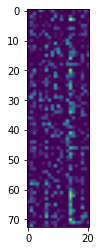

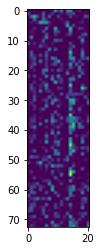

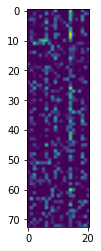

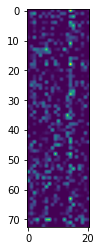

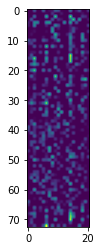

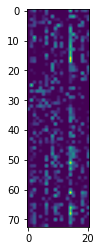

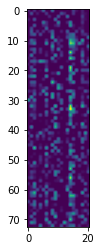

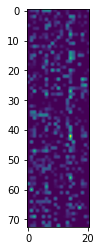

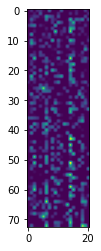

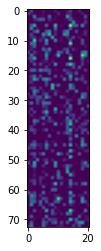

In [ ]:
for i in range(0,200,20):  
  activations = activation_model.predict(x_test1[i].reshape(1,298,90,1))
  activation=activations[5]
  plt.imshow(activation[0, :, :, 1])
  plt.show()

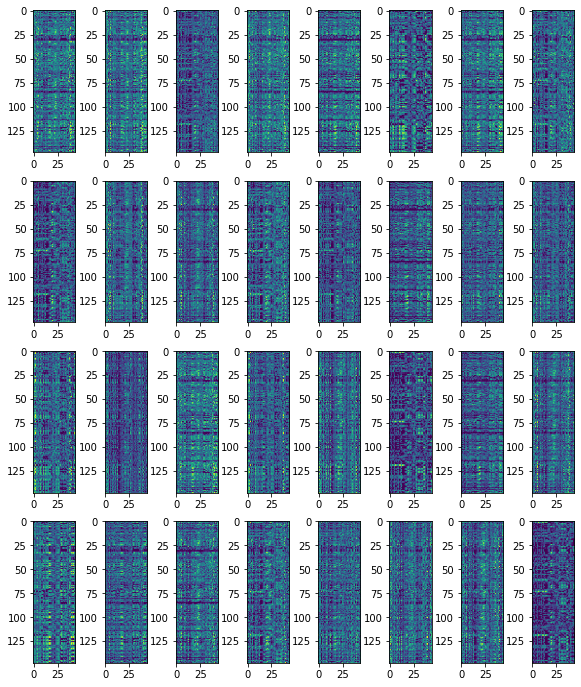

In [ ]:
display_activation(activations, 8, 4, 2)

In [ ]:
x_test1.shape

(325, 298, 90, 1)

# validation testing

In [ ]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/replication%20origins%20in%20S.%20cerevisiae.txt

--2021-01-15 18:37:38--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/replication%20origins%20in%20S.%20cerevisiae.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1844311 (1.8M) [text/plain]
Saving to: ‘replication origins in S. cerevisiae.txt.2’

replication origins 100%[===================>]   1.76M  --.-KB/s    in 0.08s   

2021-01-15 18:37:39 (22.9 MB/s) - ‘replication origins in S. cerevisiae.txt.2’ saved [1844311/1844311]



In [ ]:
file=open("/content/replication origins in S. cerevisiae.txt","r")
data=file.read()

In [ ]:
from itertools import permutations 
combs=[''.join(p) for p in permutations('ATGC')] 

In [ ]:
c=data.split("\n")

In [ ]:
val_x=[]
val_y=[]
seq_data=np.zeros(90)
for seq in c[1:]:
  if seq[0]==">":
    val_x.append(seq_data)
    seq_data=np.zeros(90)
    val_y.append(1)
  else:
    for pos in range(0,59):
        if seq[pos:pos+2] in combs:
          seq_data+=np.array(data_parameters[i[pos:pos+2]])

In [ ]:
len(val_x),len(val_y)

(828, 828)

In [ ]:
val_x=np.array(val_x)
val_y=np.array(val_y)

In [ ]:
val_x.shape,val_y.shape

((828, 90), (828,))

In [ ]:
val_x=val_x.reshape(828,90);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
val_x=MinMaxScaler().fit_transform(val_x)

In [ ]:
val_x.shape

(828, 90)

In [ ]:
linear_reg.predict(val_x)-val_y

array([5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
       5.90383282e+13, 5.90383282e+13, 5.90383282e+13, 5.90383282e+13,
      